In [53]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [54]:
# single site operators

x_plus_1 = np.array(np.matrix([[0,0,0],[0,0,0],[0,1,0]]))
x_minus_1 = np.array(np.matrix([[0,0,0],[0,0,1],[0,0,0]]))
x_plus_2 = np.array(np.matrix([[0,1,0],[0,0,0],[0,0,0]]))
x_minus_2 = np.array(np.matrix([[0,0,0],[1,0,0],[0,0,0]]))

T_plus_1_1 = np.array(np.matrix([[0,0,0],[0,1,0],[0,0,-1]]))
T_minus_1_1 = T_plus_1_1
T_plus_1_2 = np.array(np.matrix([[0,0,0],[0,0,0],[-1,0,0]]))
T_minus_1_2 = np.array(np.matrix([[0,0,-1],[0,0,0],[0,0,0]]))
T_plus_2_1 = T_minus_1_2
T_minus_2_1 = T_plus_1_2
T_plus_2_2 = np.array(np.matrix([[-1,0,0],[0,1,0],[0,0,0]]))
T_minus_2_2 = T_plus_2_2

id = np.eye(3)

In [ ]:
# manual operator definitions for two sites

psi_plus_1_1 = np.kron(x_plus_1,id)
psi_minus_1_1 = np.kron(x_minus_1,id)
psi_plus_1_2 = np.kron(x_plus_2,id)
psi_minus_1_2 = np.kron(x_minus_2,id)

psi_plus_2_1 = np.kron(T_plus_1_1, x_plus_1) + np.kron(T_plus_1_2, x_plus_2)
psi_minus_2_1 = np.kron(T_minus_1_1, x_minus_1) + np.kron(T_minus_1_2, x_minus_2)
psi_plus_2_2 = np.kron(T_plus_2_1, x_plus_1) + np.kron(T_plus_2_2, x_plus_2)
psi_minus_2_2 = np.kron(T_minus_2_1, x_minus_1) + np.kron(T_minus_2_2, x_minus_2)

n_1 = psi_plus_1_1 @ psi_minus_1_1 + psi_plus_1_2 @ psi_minus_1_2
n_2 = psi_plus_2_1 @ psi_minus_2_1 + psi_plus_2_2 @ psi_minus_2_2
total_n = n_1 + n_2

In [ ]:
import numpy as np
from itertools import product

# Identity for single site
id3 = np.eye(3)

# Define x^{(±)}_{i,alpha}
x_matrices = {
    ('+', 1): np.array([[0, 0, 0], [0, 0, 0], [0, 1, 0]]),
    ('-', 1): np.array([[0, 0, 0], [0, 0, 1], [0, 0, 0]]),
    ('+', 2): np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]]),
    ('-', 2): np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]]),
}

# Define T^{(±)}_{k,alpha,beta}
T_matrices = {
    ('+', 1, 1): np.array([[0, 0, 0], [0, 1, 0], [0, 0, -1]]),
    ('-', 1, 1): np.array([[0, 0, 0], [0, 1, 0], [0, 0, -1]]),
    ('+', 1, 2): np.array([[0, 0, 0], [0, 0, 0], [-1, 0, 0]]),
    ('-', 1, 2): np.array([[0, 0, -1], [0, 0, 0], [0, 0, 0]]),
    ('+', 2, 1): np.array([[0, 0, -1], [0, 0, 0], [0, 0, 0]]),
    ('-', 2, 1): np.array([[0, 0, 0], [0, 0, 0], [-1, 0, 0]]),
    ('+', 2, 2): np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]]),
    ('-', 2, 2): np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]]),
}

def build_psi(N, site_index, alpha, sign):
    "placeholder"
    
    assert 1 <= site_index <= N
    assert alpha in [1, 2]
    assert sign in ['+', '-']

    total_op = np.zeros((3**N, 3**N))

    for beta_chain in product([1, 2], repeat=site_index - 1):
        op_list = []

        # Construct T^{(sign)}_1,...,_{i-1} part
        prev_beta = alpha
        for k, curr_beta in enumerate(beta_chain):
            T_k = T_matrices[(sign, prev_beta, curr_beta)]
            op_list.append(T_k)
            prev_beta = curr_beta

        # Now construct x^{(sign)}_{i,curr_beta}
        x_op = x_matrices[(sign, prev_beta)]
        op_list.append(x_op)

        # Pad identity operators to the left and right
        full_op_list = (
            [id3] * (site_index - len(op_list)) + op_list + [id3] * (N - site_index)
        )

        # Kronecker product chain
        kron_op = full_op_list[0]
        for m in range(1, len(full_op_list)):
            kron_op = np.kron(kron_op, full_op_list[m])

        total_op += kron_op

    return total_op


In [74]:
build_psi(N=1, site_index = 1, alpha = 2, sign = "+")

array([[0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# Build ψ^{(+)}_{2,2} for N = 2 sites
new_psi_plus_2_2 = build_psi(N = 2, site_index = 2, alpha = 2, sign = '+')
new_psi_minus_2_2 = build_psi(N = 2, site_index = 2, alpha = 2, sign = "-")


In [59]:
# at J/V = 0
N = 2
M = 3
V = 1

zero_hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio = 0, J_V_ratio = 0)
zero_eigenvalues, zero_eigenvectors = exact_diagonalize(zero_hamiltonian)

for i, state in enumerate(zero_eigenvectors):
    occ1 = state.T.conj() @ n_1 @ state
    occ2 = state.T.conj() @ n_2 @ state
    occ = state.T.conj() @ total_n @ state
    
    print("------------------------------------------------------------")
    print(f"Eigenstate {i}")
    print(f"Energy = {zero_eigenvalues[i]} [E/|V|]")
    print(f"<n> = {np.round(np.real(occ),3)}")
    print(f"<n1> = {np.round(np.real(occ1),3)}")
    print(f"<n2> = {np.round(np.real(occ2),3)}")
    
    if i == len(zero_eigenvectors)-1:
        print("------------------------------------------------------------")
    

------------------------------------------------------------
Eigenstate 0
Energy = -1.0 [E/|V|]
<n> = 1.0
<n1> = 0.5
<n2> = 0.5
------------------------------------------------------------
Eigenstate 1
Energy = -1.0 [E/|V|]
<n> = 1.0
<n1> = 0.5
<n2> = 0.5
------------------------------------------------------------
Eigenstate 2
Energy = 0.0 [E/|V|]
<n> = 2.0
<n1> = 1.0
<n2> = 1.0
------------------------------------------------------------
Eigenstate 3
Energy = 0.0 [E/|V|]
<n> = 2.0
<n1> = 1.0
<n2> = 1.0
------------------------------------------------------------
Eigenstate 4
Energy = 0.0 [E/|V|]
<n> = 0.0
<n1> = 0.0
<n2> = 0.0
------------------------------------------------------------
Eigenstate 5
Energy = 0.0 [E/|V|]
<n> = 2.0
<n1> = 1.0
<n2> = 1.0
------------------------------------------------------------
Eigenstate 6
Energy = 0.0 [E/|V|]
<n> = 2.0
<n1> = 1.0
<n2> = 1.0
------------------------------------------------------------
Eigenstate 7
Energy = 1.0 [E/|V|]
<n> = 1.0
<n1>

In [60]:
# around J/V = 0
N = 2
M = 3
V = 1

J_V_ratios = np.linspace(0,0.5,100)

occupations_1 = []
occupations_2 = []
total_occupations = []

for J_V_ratio in J_V_ratios:
    hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio = 0, J_V_ratio = J_V_ratio)
    eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
    
    occupation_1_by_state = []
    occupation_2_by_state = []
    total_occupations_by_state = []

    for state in eigenvectors:
        occ1 = state.T.conj() @ n_1 @ state
        occ2 = state.T.conj() @ n_2 @ state
        occ = state.T.conj() @ total_n @ state
        occupation_1_by_state.append(occ1)
        occupation_2_by_state.append(occ2)
        total_occupations_by_state.append(occ)
        
    occupations_1.append(occupation_1_by_state)
    occupations_2.append(occupation_2_by_state)
    total_occupations.append(total_occupations_by_state)
    
occupations_1 = np.array(occupations_1)
occupations_2 = np.array(occupations_2)
total_occupations = np.array(total_occupations)

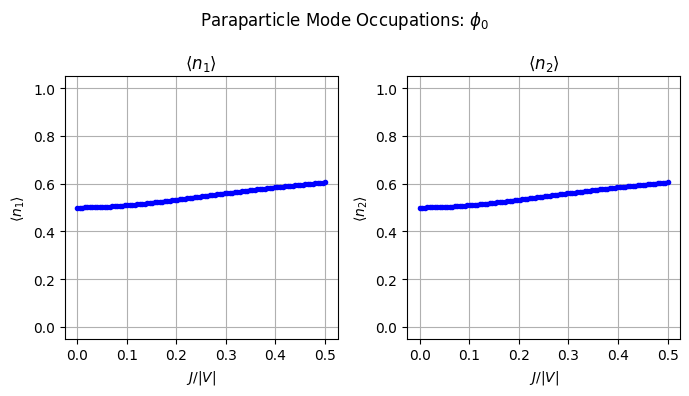

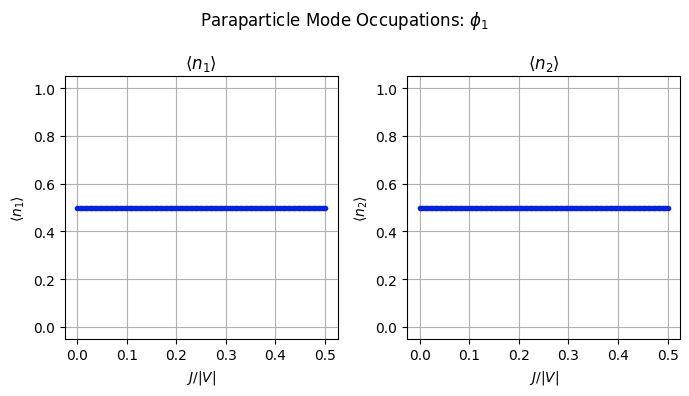

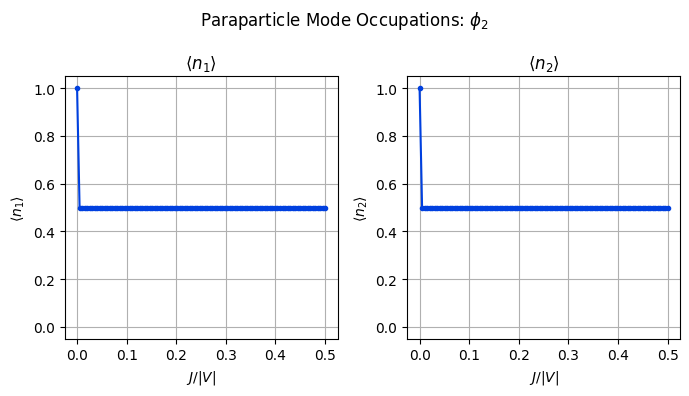

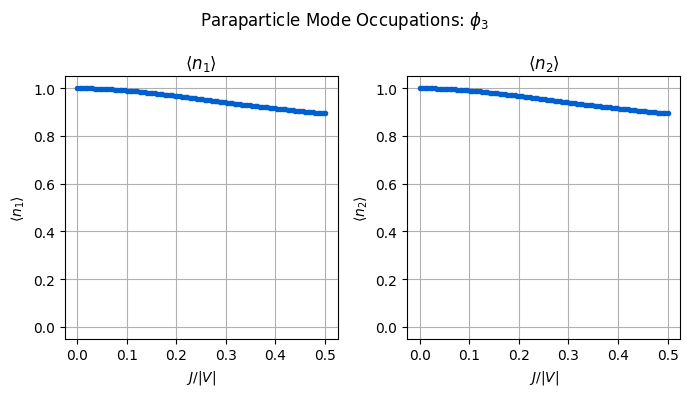

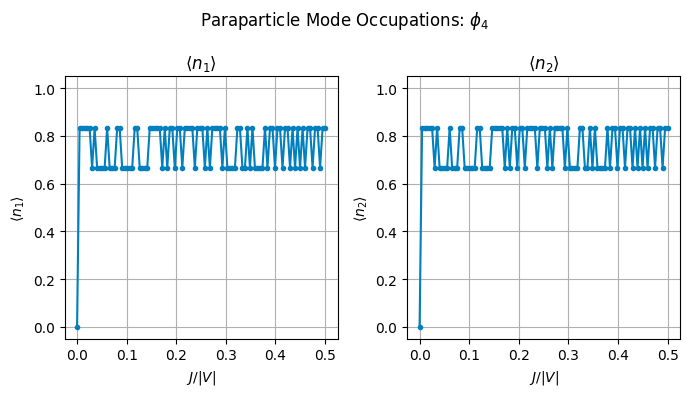

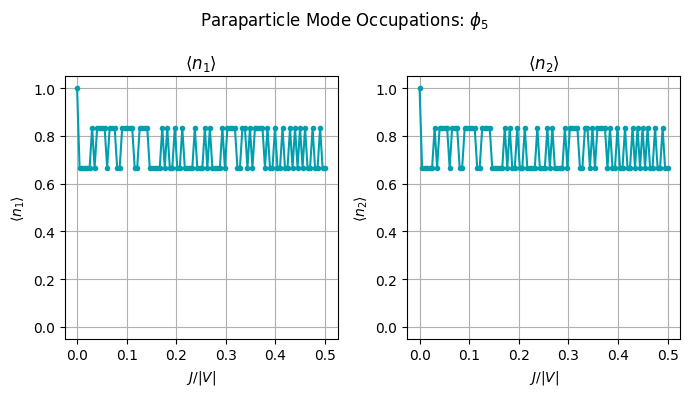

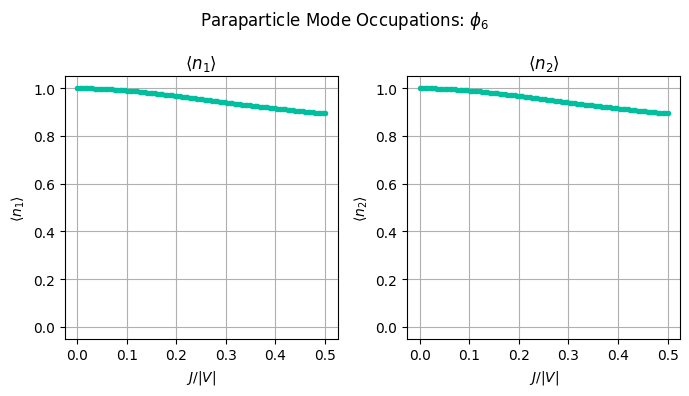

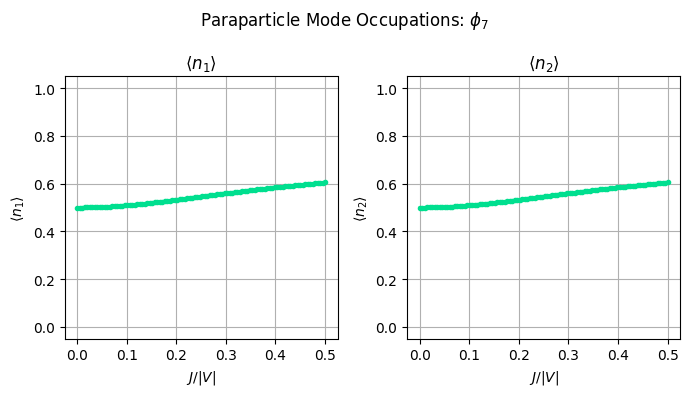

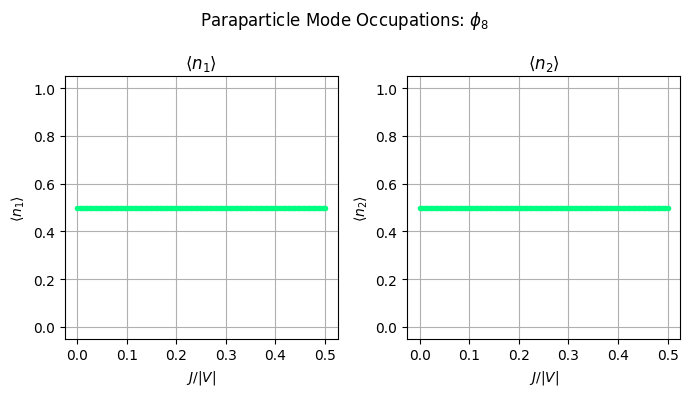

In [61]:
colors = get_cmap("winter", M**N)
occupations = [occupations_1, occupations_2]


for i in range(M**N):
    fig, (ax1,ax2) = plt.subplots(figsize = (7,4), ncols = 2)
    axes = [ax1, ax2]
    for j, ax in enumerate(axes):
        ax.plot(J_V_ratios, occupations[j][:,i], color = colors(i))
        ax.plot(J_V_ratios, occupations[j][:,i], '.', color = colors(i))
        ax.set_ylim(-0.05,1.05)
        ax.set_title(f"$\langle n_{j+1} \\rangle$")
        ax.set_xlabel("$J/|V|$")
        ax.set_ylabel(f"$\langle n_{j+1} \\rangle$")
        ax.grid()
        fig.suptitle(f"Paraparticle Mode Occupations: $\phi_{i}$")
    fig.tight_layout()
    

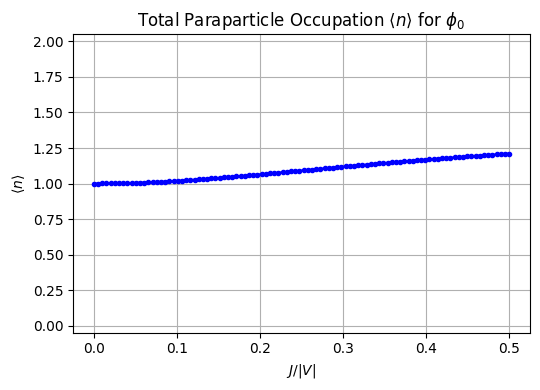

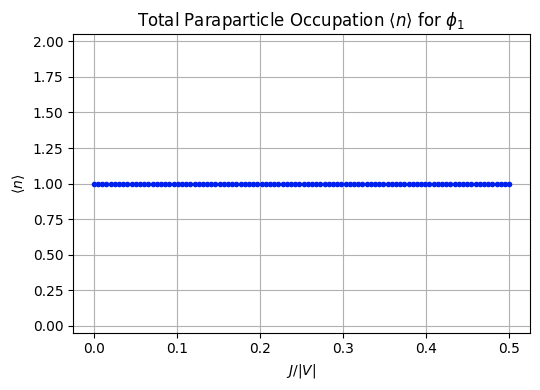

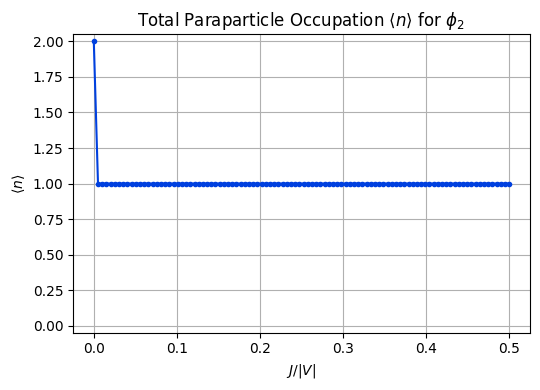

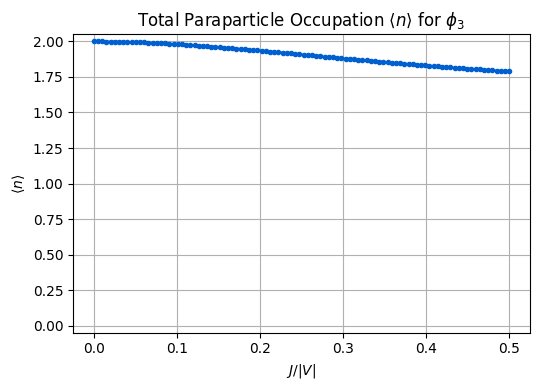

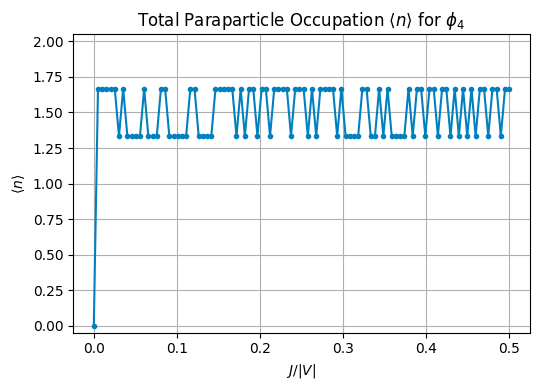

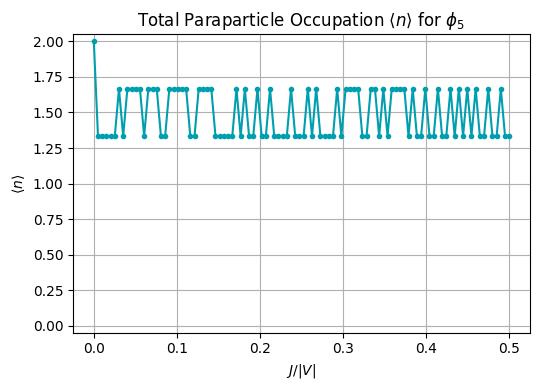

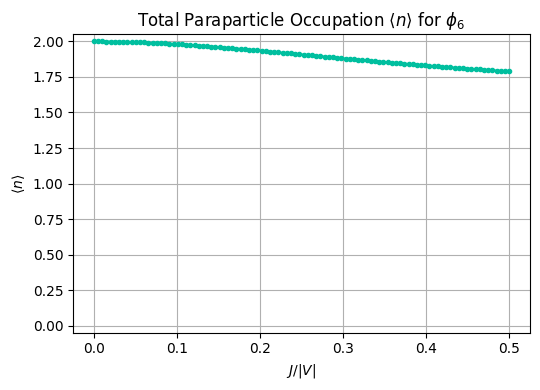

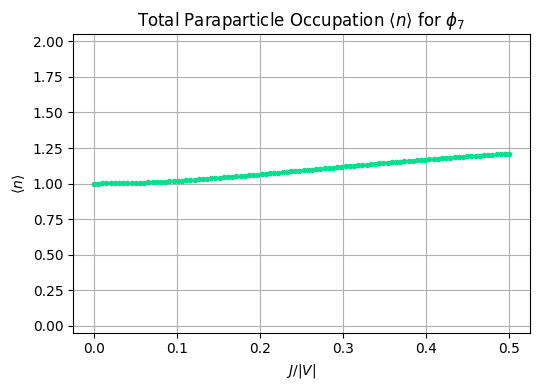

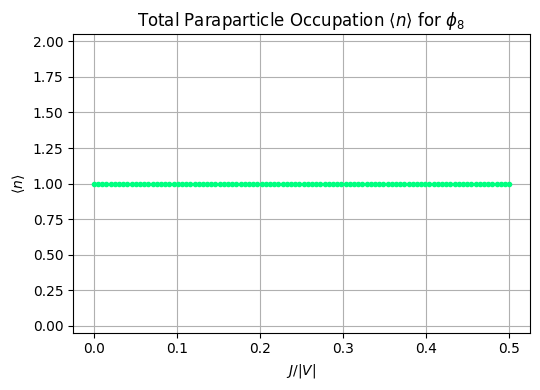

In [62]:
colors = get_cmap("winter", M**N)

for i in range(M**N):
    fig, ax = plt.subplots(figsize = (5.5,4))
    ax.plot(J_V_ratios, total_occupations[:,i], color = colors(i))
    ax.plot(J_V_ratios, total_occupations[:,i], '.', color = colors(i))
    ax.set_ylim(-0.05,2.05)
    ax.set_title(f"Total Paraparticle Occupation $\langle n \\rangle$ for $\phi_{i}$")
    ax.grid()
    ax.set_xlabel("$J/|V|$")
    ax.set_ylabel(f"$\langle n \\rangle$")
    fig.tight_layout()